<a href="https://colab.research.google.com/github/manyaverma11/Bookshelf.in/blob/main/Copy_of_102203284_KNN_Handwritten_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Handwritten Digit Recognition

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import  StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data (2).csv to data (2).csv
Saving test.csv to test.csv


# Loading the MNIST datasets

In [ ]:

test_df = pd.read_csv("test.csv")

In [ ]:
data_df = pd.read_csv("data (2).csv")

In [ ]:
data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# For train and test both we will use train.csv (Taking train data as complete data)

In [ ]:
data_df.shape

(42000, 785)

# Data Preparation for Model Building

In [ ]:
y=data_df['label']
x=data_df.drop('label',axis=1)

In [ ]:
import numpy as np

In [ ]:
type(x)

pandas.core.frame.DataFrame

6


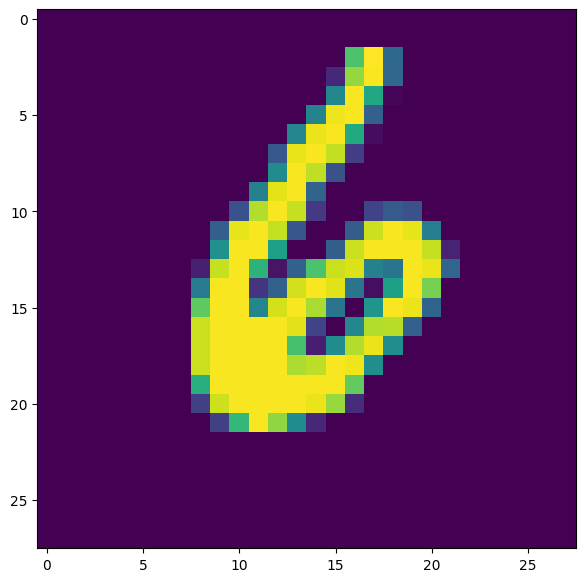

In [ ]:
plt.figure(figsize=(7,7))
some_digit=1266
some_digit_image = x.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))
print(y[some_digit])

<Axes: xlabel='label', ylabel='count'>

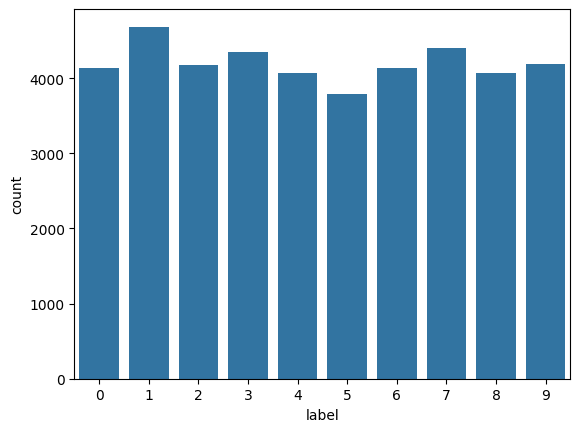

In [ ]:
sns.countplot( x='label', data=data_df)

#### we can conclude that our dataset is balanced

# Splitting the train data  into train and test

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 60)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 70)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 75)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 80)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 90)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 95)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((21000, 784), (21000,), (21000, 784), (21000,))

# **Models**

# KNN

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train,y_train)
x_train = scaler.transform(x_train)
x_train.shape

(21000, 784)

# k=10

In [ ]:
#classifier = KNeighborsClassifier(n_neighbors = 2)
#classifier.fit(x_train, y_train)

#classifier = KNeighborsClassifier(n_neighbors = 4)
#classifier.fit(x_train, y_train)

#classifier = KNeighborsClassifier(n_neighbors = 5)
#classifier.fit(x_train, y_train)

#classifier = KNeighborsClassifier(n_neighbors = 6)
#classifier.fit(x_train, y_train)

#classifier = KNeighborsClassifier(n_neighbors = 7)
#classifier.fit(x_train, y_train)

classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([9, 0, 1, ..., 8, 2, 8])

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8346190476190476


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.99      0.79      2040
           1       1.00      0.92      0.96      2349
           2       0.93      0.88      0.91      2117
           3       0.94      0.81      0.87      2182
           4       0.99      0.56      0.72      2053
           5       0.97      0.61      0.75      1852
           6       0.94      0.94      0.94      2054
           7       0.94      0.85      0.89      2175
           8       0.57      0.95      0.72      2050
           9       0.80      0.80      0.80      2128

    accuracy                           0.83     21000
   macro avg       0.87      0.83      0.83     21000
weighted avg       0.88      0.83      0.84     21000



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[2023    0    0    0    0    0    3    0   14    0]
 [   3 2156   24    3    0    1   16    3  143    0]
 [ 152    0 1865   12    1    0   13    5   65    4]
 [ 114    1   49 1775    0   18    3    7  205   10]
 [ 259    0    7    0 1152    0   52   11  289  283]
 [ 242    0    2   71    0 1136   28    2  358   13]
 [ 102    1    0    0    0    3 1925    0   23    0]
 [  72    0   48   12    2    0    1 1847   92  101]
 [  52    1    6   14    2   10    3    5 1956    1]
 [  85    0    1    7    2    3    1   76  261 1692]]


# **10NN-83.46% accuracy**